In [1]:
import numpy as np
import pandas as pd

In [50]:
df = pd.read_csv('ETSYCLEAN.csv')

In [51]:
df['Sentiment'] = ''

# map 1 to 'positive' and 0 to 'negative' in the new "Sentiment" column
df.loc[df["Sales Dummy"] == 1, 'Sentiment'] = 'positive'
df.loc[df["Sales Dummy"] == 0, 'Sentiment'] = 'negative'

In [52]:
df.isnull().sum()

Unnamed: 0      0
Sales           0
Announcement    0
Admirer         0
Badge           0
Category        0
Shipping        0
Review          0
Reply           0
Year            0
Seller          0
Announce        0
Location        0
Rating          0
Total Items     0
Image           0
Sales Dummy     0
Sentiment       0
dtype: int64

In [53]:
df["Announcement"].str.isspace().sum()

0

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')

matrix = cv.fit_transform(df[df['Sentiment']=='negative']['Announcement'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])  

# sort from largest to smallest
print("Top 40 words used for shops below the median of Sales.")
print(sorted(freqs, key=lambda x: -x[1])[:40])

matrix = cv.fit_transform(df[df['Sentiment']=='positive']['Announcement'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])   

# sort from largest to smallest
print(" ")
print("Top 40 words used for shops above the median of Sales.")
print(sorted(freqs, key=lambda x: -x[1])[:40])

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Top 40 words used for Negative reviews.
[('_x000d_', 5984), ('com', 1781), ('shop', 1700), ('items', 1522), ('etsy', 1271), ('www', 1233), ('shipping', 1045), ('welcome', 970), ('jewelry', 946), ('art', 840), ('new', 834), ('vintage', 781), ('custom', 759), ('love', 722), ('free', 719), ('make', 693), ('thank', 676), ('orders', 666), ('time', 636), ('facebook', 603), ('order', 595), ('https', 574), ('http', 567), ('like', 538), ('designs', 537), ('hand', 536), ('work', 531), ('instagram', 513), ('check', 510), ('handmade', 499), ('just', 483), ('unique', 439), ('contact', 435), ('ship', 432), ('item', 431), ('pieces', 426), ('home', 420), ('questions', 411), ('use', 405), ('thanks', 394)]
 
Top 40 words used for Positive reviews.
[('_x000d_', 11434), ('com', 3149), ('shop', 2593), ('shipping', 2512), ('etsy', 2290), ('www', 2171), ('items', 2095), ('order', 1970), ('orders', 1637), ('time', 1400), ('jewelry', 1336), ('custom', 1225), ('free', 1188), ('facebook', 1166), ('new', 1081), (

In [55]:
from sklearn.model_selection import train_test_split
X = df["Announcement"]
y = df["Sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 101)

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

pipe = Pipeline([('tfidf', TfidfVectorizer()),('svc', LinearSVC()),])
pipe.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

              precision    recall  f1-score   support

    negative       0.64      0.69      0.66       610
    positive       0.65      0.60      0.62       589

    accuracy                           0.64      1199
   macro avg       0.64      0.64      0.64      1199
weighted avg       0.64      0.64      0.64      1199



D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


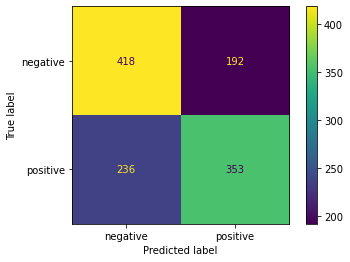

In [57]:
from sklearn.metrics import classification_report,plot_confusion_matrix
preds = pipe.predict(X_test)
print(classification_report(y_test,preds))
plot_confusion_matrix(pipe,X_test,y_test)